In [ ]:
!pip install nomic

In [ ]:
!nomic login

                                  Authenticate with the Nomic API                                   
                                  https://atlas.nomic.ai/cli-login                                  
       Click the above link to retrieve your access token and then run `nomic login [token]`        


In [ ]:
!nomic login nk-ULpYAMMQaezo9MSIBueaig9gwjnCE2hJtRDDhL-HACs

In [ ]:
from transformers import GPT2Tokenizer, GPT2Model
# from transformers import GPT2LMHeadModel
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
from nomic import atlas
import numpy as np
from transformers import GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained('gpt2')
# embeddings = model.embeddings.word_embeddings.weight
embeddings = model.transformer.wte.weight
embeddings_array= embeddings.detach().numpy()
embeddings_array

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

array([[-0.11010301, -0.03926672,  0.03310751, ..., -0.1363697 ,
         0.01506208,  0.04531523],
       [ 0.04034033, -0.04861503,  0.04624869, ...,  0.08605453,
         0.00253983,  0.04318958],
       [-0.12746179,  0.04793796,  0.18410145, ...,  0.08991534,
        -0.12972379, -0.08785918],
       ...,
       [-0.04453601, -0.05483596,  0.01225674, ...,  0.10435229,
         0.09783269, -0.06952604],
       [ 0.1860082 ,  0.01665728,  0.04611587, ..., -0.09625227,
         0.07847701, -0.02245961],
       [ 0.05135201, -0.02768905,  0.0499369 , ...,  0.00704835,
         0.15519823,  0.12067825]], dtype=float32)

In [ ]:
model.embeddings.word_embeddings


Embedding(30522, 768, padding_idx=0)

In [ ]:
import json

# Assuming 'data.json' is the name of your JSON file
with open('/content/tokenizer-4.json') as f:
    data = json.load(f)

In [ ]:
# Original dictionary
original_dict = data
# Inverted dictionary using dictionary comprehension
inverted_dict = {key: model.transformer.wte.weight[value].detach() for key, value in original_dict['model']['vocab'].items()}

# Output the inverted dictionary
# print(inverted_dict)


In [ ]:
tokens = sorted(original_dict['model']['vocab'].items(), key=lambda x: x[1])

In [ ]:
import pandas as pd
dataset = atlas.map_data(embeddings=embeddings_array, data=[{'token': x[0]} for x in tokens])
print(dataset)

2024-04-07 00:30:20.926 | WARNING  | nomic.atlas:map_data:96 - An ID field was not specified in your data so one was generated for you in insertion order.
2024-04-07 00:30:23.822 | INFO     | nomic.dataset:_create_project:897 - Creating dataset `curious-shannon`
2024-04-07 00:30:24.195 | INFO     | nomic.atlas:map_data:108 - Uploading data to Atlas.
11it [00:03,  3.15it/s]
2024-04-07 00:30:28.386 | INFO     | nomic.dataset:_add_data:1567 - Upload succeeded.
2024-04-07 00:30:28.391 | INFO     | nomic.atlas:map_data:123 - `ya2351/curious-shannon`: Data upload succeeded to dataset`
2024-04-07 00:30:28.732 | WARNING  | nomic.dataset:create_index:1140 - You did not specify the `topic_label_field` option in your topic_model, your dataset will not contain auto-labeled topics.
2024-04-07 00:30:29.706 | INFO     | nomic.dataset:create_index:1276 - Created map `curious-shannon` in dataset `ya2351/curious-shannon`: https://atlas.nomic.ai/data/ya2351/curious-shannon/map


curious-shannon: https://atlas.nomic.ai/data/ya2351/curious-shannon/map


In [ ]:
inverted_dict['tread']

**These are visualizations of GPT-2 token embeddings**

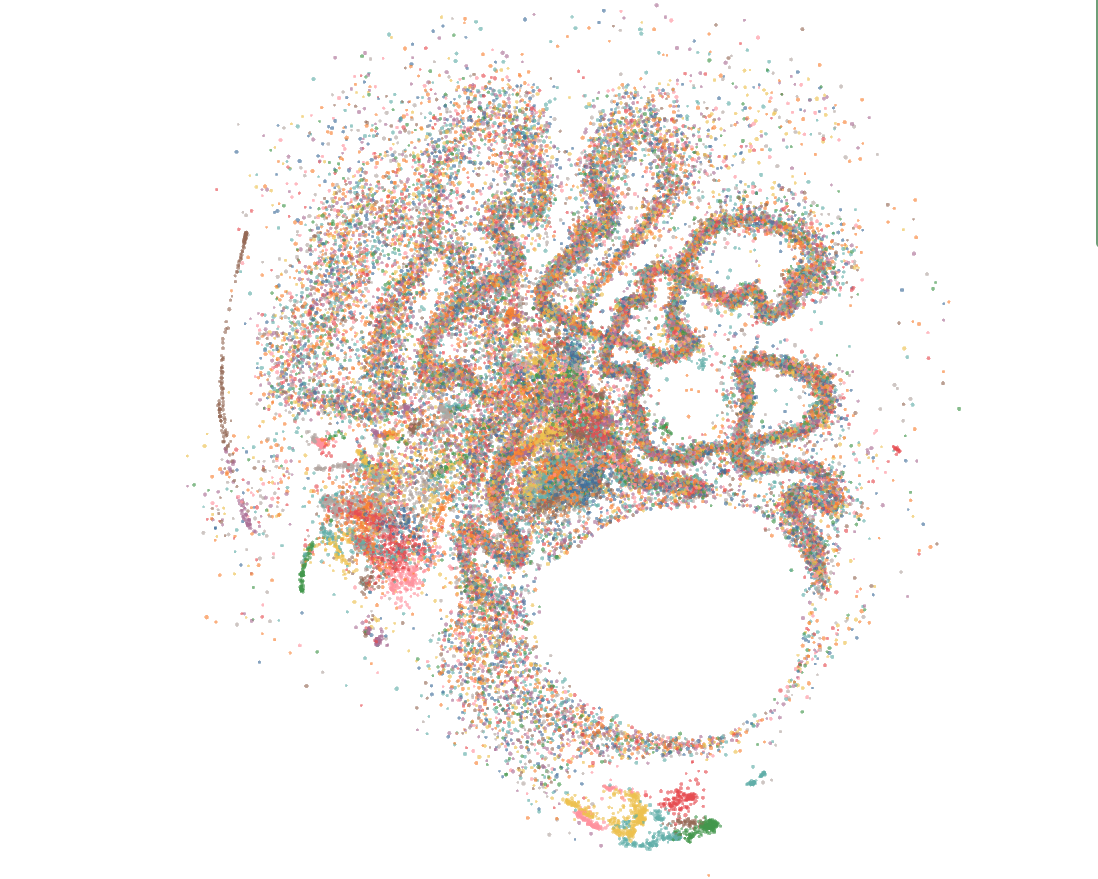